<a href="https://colab.research.google.com/github/fjadidi2001/AD_Prediction/blob/main/Denoise_May18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

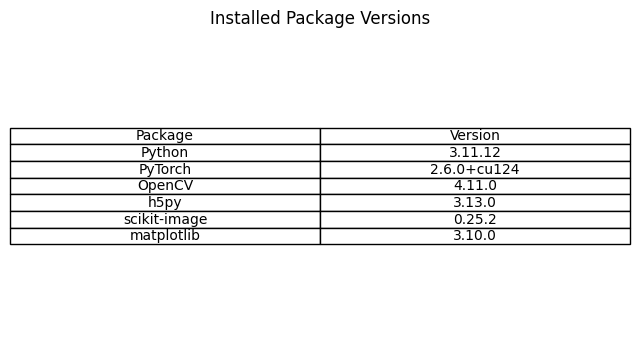

Environment setup complete.


In [1]:
# Cell 1: Environment Setup and Dependencies

# Install required packages
!pip install torch torchvision torchaudio
!pip install opencv-python-headless
!pip install h5py
!pip install scikit-image
!pip install matplotlib

# Import libraries for version checking
import torch
import cv2
import h5py
import skimage
import matplotlib
import sys

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create directories
import os
os.makedirs('/content/BSR', exist_ok=True)
os.makedirs('/content/logos', exist_ok=True)
os.makedirs('/content/saved_models', exist_ok=True)
os.makedirs('/content/data/output', exist_ok=True)

# Collect package versions
versions = {
    'Package': ['Python', 'PyTorch', 'OpenCV', 'h5py', 'scikit-image', 'matplotlib'],
    'Version': [
        sys.version.split()[0],
        torch.__version__,
        cv2.__version__,
        h5py.__version__,
        skimage.__version__,
        matplotlib.__version__
    ]
}

# Create table
import pandas as pd
import matplotlib.pyplot as plt

df_versions = pd.DataFrame(versions)
plt.figure(figsize=(8, 4))
plt.axis('off')
plt.table(cellText=df_versions.values, colLabels=df_versions.columns, loc='center', cellLoc='center')
plt.title("Installed Package Versions")
plt.savefig('/content/package_versions.png')
plt.show()

print("Environment setup complete.")

--2025-05-18 09:29:16--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70763455 (67M) [application/x-tar]
Saving to: ‘/content/BSR_bsds500.tgz’

/content/BSR_bsds50 100%[===================>]  67.48M   118MB/s    in 0.6s    

2025-05-18 09:29:16 (118 MB/s) - ‘/content/BSR_bsds500.tgz’ saved [70763455/70763455]

Dataset loaded successfully


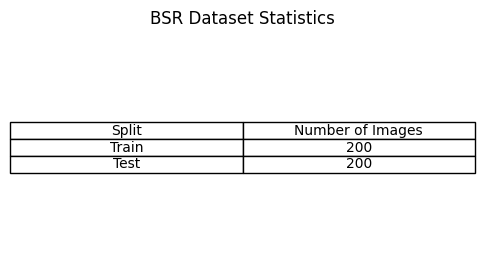

Train images: 200, Test images: 200


In [2]:
# Cell 2: Download and Verify BSR Dataset

# Download and extract BSR dataset
try:
    if not os.path.exists('/content/BSR_bsds500.tgz'):
        !wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz -O /content/BSR_bsds500.tgz
    if not os.path.exists('/content/BSR/BSDS500'):
        !tar xzf /content/BSR_bsds500.tgz -C /content
    print("Dataset loaded successfully")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Verify dataset
import glob
train_images = glob.glob('/content/BSR/BSDS500/data/images/train/*.jpg')
test_images = glob.glob('/content/BSR/BSDS500/data/images/test/*.jpg')

# Create table with dataset stats
dataset_stats = {
    'Split': ['Train', 'Test'],
    'Number of Images': [len(train_images), len(test_images)]
}
df_stats = pd.DataFrame(dataset_stats)

# Display table
plt.figure(figsize=(6, 3))
plt.axis('off')
plt.table(cellText=df_stats.values, colLabels=df_stats.columns, loc='center', cellLoc='center')
plt.title("BSR Dataset Statistics")
plt.savefig('/content/dataset_stats.png')
plt.show()

print(f"Train images: {len(train_images)}, Test images: {len(test_images)}")

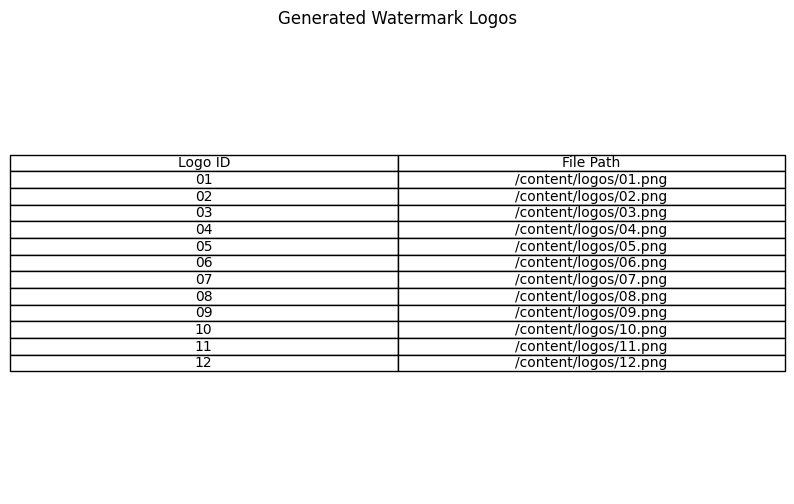

Watermark logos created successfully.


In [3]:
# Cell 3: Generate Placeholder Watermark Logos

from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Create 12 placeholder watermark images
logo_dir = '/content/logos'
os.makedirs(logo_dir, exist_ok=True)

# Try to use a default font, fall back to basic if unavailable
try:
    font = ImageFont.truetype("arial.ttf", 40)
except:
    font = ImageFont.load_default()

logo_files = []
for i in range(1, 13):
    # Create a transparent 100x100 image
    img = Image.new('RGBA', (100, 100), (0, 0, 0, 0))
    draw = ImageDraw.Draw(img)
    # Add text as watermark
    draw.text((10, 40), f"WM{i:02d}", fill=(255, 255, 255, 255), font=font)
    # Save image
    filename = f'{logo_dir}/{i:02d}.png'
    img.save(filename)
    logo_files.append(filename)

# Create table of created logos
logo_stats = {
    'Logo ID': [f'{i:02d}' for i in range(1, 13)],
    'File Path': logo_files
}
df_logos = pd.DataFrame(logo_stats)

# Display table
plt.figure(figsize=(10, 6))
plt.axis('off')
plt.table(cellText=df_logos.values, colLabels=df_logos.columns, loc='center', cellLoc='center')
plt.title("Generated Watermark Logos")
plt.savefig('/content/logo_files.png')
plt.show()

print("Watermark logos created successfully.")

In [4]:
# Cell 4: Define Utility Functions

%%writefile /content/utils.py
import math
import string
import os
import torch
import torch.nn as nn
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
import random
import cv2
from PIL import Image
import glob

def seed_torch(seed=1029):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

def weights_init_kaiming(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.kaiming_normal_(m.weight.data, a=0, mode='fan_in')
    elif classname.find('Linear') != -1:
        nn.init.kaiming_normal_(m.weight.data, a=0, mode='fan_in')
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(mean=0, std=math.sqrt(2./9./64.)).clamp_(-0.025, 0.025)
        nn.init.constant_(m.bias.data, 0.0)

def batch_PSNR(img, imclean, data_range):
    Img = img.data.cpu().numpy().astype(np.float32)
    Iclean = imclean.data.cpu().numpy().astype(np.float32)
    PSNR = 0
    for i in range(Img.shape[0]):
        PSNR += peak_signal_noise_ratio(Iclean[i, :, :, :], Img[i, :, :, :], data_range=data_range)
    return PSNR / Img.shape[0]

def data_augmentation(image, mode):
    out = np.transpose(image, (1, 2, 0))
    if mode == 0:
        out = out
    elif mode == 1:
        out = np.flipud(out)
    elif mode == 2:
        out = np.rot90(out)
    elif mode == 3:
        out = np.rot90(out)
        out = np.flipud(out)
    elif mode == 4:
        out = np.rot90(out, k=2)
    elif mode == 5:
        out = np.rot90(out, k=2)
        out = np.flipud(out)
    elif mode == 6:
        out = np.rot90(out, k=3)
    elif mode == 7:
        out = np.rot90(out, k=3)
        out = np.flipud(out)
    return np.transpose(out, (2, 0, 1))

def add_text_noise(noise, occupancy=50):
    font = cv2.FONT_HERSHEY_SIMPLEX
    h, w, _ = noise.shape
    img_for_cnt = np.zeros((h, w), np.uint8)
    occupancy = np.random.uniform(0, occupancy)
    while True:
        n = random.randint(5, 10)
        random_str = ''.join([random.choice(string.ascii_letters + string.digits) for i in range(n)])
        font_scale = np.random.uniform(0.5, 1)
        thickness = random.randint(1, 3)
        (fw, fh), baseline = cv2.getTextSize(random_str, font, font_scale, thickness)
        x = random.randint(0, max(0, w - 1 - fw))
        y = random.randint(fh, h - 1 - baseline)
        color = (random.random(), random.random(), random.random())
        cv2.putText(noise, random_str, (x, y), font, font_scale, color, thickness)
        cv2.putText(img_for_cnt, random_str, (x, y), font, font_scale, 255, thickness)
        if (img_for_cnt > 0).sum() > h * w * occupancy / 100:
            break
    return noise

def add_watermark_noise(img_train, scale_lists=None, idx_lists=None, is_test=False, threshold=50):
    watermarks = [Image.open(f"/content/logos/{i:02d}.png") for i in range(1, 13)]
    img_train = img_train.numpy()
    imgn_train = img_train
    _, _, img_h, img_w = img_train.shape
    img_train = np.ascontiguousarray(np.transpose(img_train, (0, 2, 3, 1)))
    imgn_train = np.ascontiguousarray(np.transpose(imgn_train, (0, 2, 3, 1)))
    if scale_lists is None:
        ans_scale_lists = []
        ans_idx_lists = []
    else:
        ans_scale_lists = scale_lists
        ans_idx_lists = idx_lists
    for i in range(len(img_train)):
        tmp = Image.fromarray((img_train[i] * 255).astype(np.uint8))
        img_for_cnt = np.zeros((img_h, img_w, 3), np.uint8)
        img_for_cnt = Image.fromarray(img_for_cnt)
        if scale_lists is None:
            scale_list = []
            idx = random.randint(0, 11)
            ans_idx_lists.append(idx)
            watermark = watermarks[idx]
            w, h = watermark.size
            mark_size = np.array(watermark).size
            if is_test:
                occupancy = threshold
            else:
                occupancy = np.random.uniform(0, 10)
            cnt, ratio = 0, img_w * img_h * 3 * occupancy / 100
            finish = False
            while True:
                if (ratio - cnt) < mark_size * 0.3:
                    img_train[i] = np.array(tmp).astype(np.float64) / 255.
                    break
                elif (ratio - cnt) < mark_size:
                    scale = (ratio - cnt) * 1.0 / mark_size
                    finish = True
                else:
                    scale = np.random.uniform(0.5, 1)
                scale_list.append(scale)
                water = watermark.resize((int(w * scale), int(h * scale)))
                x = random rejects
                random.randint(0, img_w - int(w * scale))
                y = random.randint(0, img_h - int(w * scale))
                tmp.paste(water, (x, y), water)
                img_for_cnt.paste(water, (x, y), water)
                img_cnt = np.array(img_for_cnt)
                cnt = (img_cnt > 0).sum()
                if finish:
                    img_train[i] = np.array(tmp).astype(np.float64) / 255.
                    break
            ans_scale_lists.append(scale_list)
        else:
            scale_list = scale_lists[i]
            idx = idx_lists[i]
            watermark = watermarks[idx]
            w, h = watermark.size
            for ii in range(len(scale_list)):
                scale = scale_list[ii]
                water = watermark.resize((int(w * scale), int(h * scale)))
                x = random.randint(0, img_w - int(w * scale))
                y = random.randint(0, img_h - int(w * scale))
                tmp.paste(water, (x, y), water)
            img_train[i] = np.array(tmp).astype(np.float64) / 255.
    img_train = np.transpose(img_train, (0, 3, 1, 2))
    imgn_train = np.transpose(imgn_train, (0, 3, 1, 2))
    return img_train, img_train - imgn_train, ans_scale_lists, ans_idx_lists

def add_watermark_noise_test(img, num_wm=1):
    watermarks = [Image.open(f"/content/logos/{i:02d}.png") for i in range(1, 13)]
    img = img.numpy()
    imgn = img
    _, _, img_h, img_w = img.shape
    img = np.ascontiguousarray(np.transpose(img, (0, 2, 3, 1)))
    imgn = np.ascontiguousarray(np.transpose(imgn, (0, 2, 3, 1)))
    for i in range(len(img)):
        tmp = Image.fromarray((img[i] * 255).astype(np.uint8))
        idx = random.randint(0, 11)
        watermark = watermarks[idx]
        w, h = watermark.size
        for ii in range(num_wm):
            scale = np.random.uniform(0.5, 1)
            water = watermark.resize((int(w * scale), int(h * scale)))
            x = random.randint(0, img_w - int(w * scale))
            y = random.randint(0, img_h - int(w * scale))
            tmp.paste(water, (x, y), water)
        img[i] = np.array(tmp).astype(np.float64) / 255.
    img = np.transpose(img, (0, 3, 1, 2))
    imgn = np.transpose(imgn, (0, 3, 1, 2))
    return img, img - imgn

# Create table of defined functions
functions = {
    'Function': [
        'seed_torch', 'weights_init_kaiming', 'batch_PSNR',
        'data_augmentation', 'add_text_noise', 'add_watermark_noise',
        'add_watermark_noise_test'
    ],
    'Purpose': [
        'Set random seed for reproducibility',
        'Initialize weights using Kaiming method',
        'Calculate batch PSNR',
        'Apply data augmentation',
        'Add text noise to images',
        'Add watermark noise for training',
        'Add watermark noise for testing'
    ]
}
df_functions = pd.DataFrame(functions)

# Display table
plt.figure(figsize=(10, 6))
plt.axis('off')
plt.table(cellText=df_functions.values, colLabels=df_functions.columns, loc='center', cellLoc='center')
plt.title("Defined Utility Functions")
plt.savefig('/content/utility_functions.png')
plt.show()

print("Utility functions defined in utils.py")

Writing /content/utils.py


In [6]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=93ff01a401cefcb8811b9d07321b6b3bc8ee97daa97e33385249c906cf902840
  Stored in directory: /root/.cache/pip/wheels/15/0c/b3/674aea8c5d91c642c817d4d630bd58faa316724b136844094d
Successfully built utils


In [7]:
# Cell 5: Data Preprocessing and Dataset Definition

import os
import numpy as np
import random
import h5py
import torch
import cv2
import glob
import torch.utils.data as udata
from utils import data_augmentation

def normalize(data):
    return data / 255.

def Im2Patch(img, win, stride=1):
    k = 0
    endc = img.shape[0]
    endw = img.shape[1]
    endh = img.shape[2]
    patch = img[:, 0:endw - win + 0 + 1:stride, 0:endh - win + 0 + 1:stride]
    TotalPatNum = patch.shape[1] * patch.shape[2]
    Y = np.zeros([endc, win * win, TotalPatNum], np.float32)
    for i in range(win):
        for j in range(win):
            patch = img[:, i:endw - win + i + 1:stride, j:endh - win + j + 1:stride]
            Y[:, k, :] = np.array(patch[:]).reshape(endc, TotalPatNum)
            k = k + 1
    return Y.reshape([endc, win, win, TotalPatNum])

def prepare_data(data_path, patch_size, stride, aug_times=1, mode='color'):
    print('Processing training data')
    scales = [1, 0.9, 0.8, 0.7]
    files = glob.glob(os.path.join(data_path, 'train', '*.jpg'))
    files.sort()
    h5f = h5py.File('/content/train_color_right.h5', 'w')
    train_num = 0
    for i in range(len(files)):
        img = cv2.imread(files[i])
        h, w, c = img.shape
        for k in range(len(scales)):
            if int(h * scales[k]) < 256 or int(w * scales[k]) < 256:
                continue
            Img = cv2.resize(img, (int(h * scales[k]), int(w * scales[k])), interpolation=cv2.INTER_CUBIC)
            Img = np.transpose(Img, (2, 0, 1))
            Img = np.float32(normalize(Img))
            patches = Im2Patch(Img, win=patch_size, stride=stride)
            for n in range(patches.shape[3]):
                data = patches[:, :, :, n].copy()
                h5f.create_dataset(str(train_num), data=data)
                train_num += 1
                for m in range(aug_times - 1):
                    data_aug = data_augmentation(data, np.random.randint(1, 8))
                    h5f.create_dataset(str(train_num) + "_aug_%d" % (m + 1), data=data_aug)
                    train_num += 1
    h5f.close()

    print('Processing validation data')
    files = glob.glob(os.path.join(data_path, 'test', '*.jpg'))
    files.sort()
    h5f = h5py.File('/content/val_color_right.h5', 'w')
    val_num = 0
    for i in range(len(files)):
        img = cv2.imread(files[i])
        img = np.transpose(img, (2, 0, 1))
        img = np.float32(normalize(img))
        h5f.create_dataset(str(val_num), data=img)
        val_num += 1
    h5f.close()

    return {'train_samples': train_num, 'val_samples': val_num}

class Dataset(udata.Dataset):
    def __init__(self, train=True):
        super(Dataset, self).__init__()
        self.train = train
        if self.train:
            h5f = h5py.File('/content/train_color_right.h5', 'r')
        else:
            h5f = h5py.File('/content/val_color_right.h5', 'r')
        self.keys = list(h5f.keys())
        random.shuffle(self.keys)
        h5f.close()

    def __len__(self):
        return len(self.keys)

    def __getitem__(self, index):
        if self.train:
            h5f = h5py.File('/content/train_color_right.h5', 'r')
        else:
            h5f = h5py.File('/content/val_color_right.h5', 'r')
        key = self.keys[index]
        data = np.array(h5f[key])
        h5f.close()
        return torch.Tensor(data)

# Run preprocessing
data_path = '/content/BSR/BSDS500/data/images'
stats = prepare_data(data_path, patch_size=256, stride=128, aug_times=1, mode='color')

# Create table
data_stats = {
    'Dataset': ['Training', 'Validation'],
    'Number of Samples': [stats['train_samples'], stats['val_samples']]
}
df_data = pd.DataFrame(data_stats)

# Display table
plt.figure(figsize=(6, 3))
plt.axis('off')
plt.table(cellText=df_data.values, colLabels=df_data.columns, loc='center', cellLoc='center')
plt.title("Data Preprocessing Results")
plt.savefig('/content/data_preprocessing.png')
plt.show()

print(f"Training samples: {stats['train_samples']}, Validation samples: {stats['val_samples']}")

SyntaxError: invalid syntax (utils.py, line 125)